# Load Dataset

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "StudentsPerformance.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "spscientist/students-performance-in-exams",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1169061818.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 70.3k/70.3k [00:00<00:00, 34.3MB/s]

First 5 records:    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


# Import Library

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

# Exploratory Dataset

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Detect Imbalanced data

In [6]:
categorial_cols=df.select_dtypes(include=['object']).columns.tolist()

categorial_cols

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

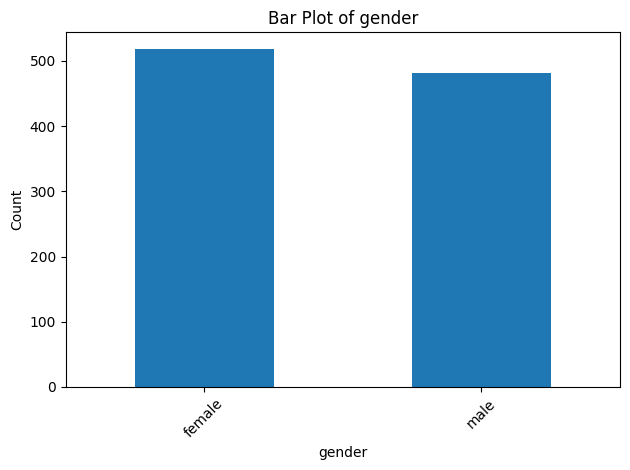

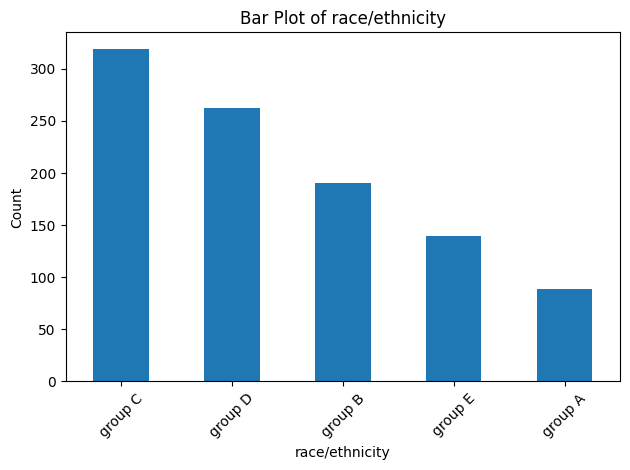

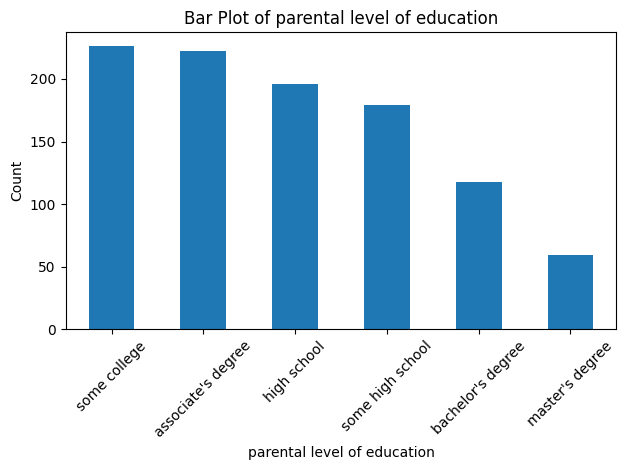

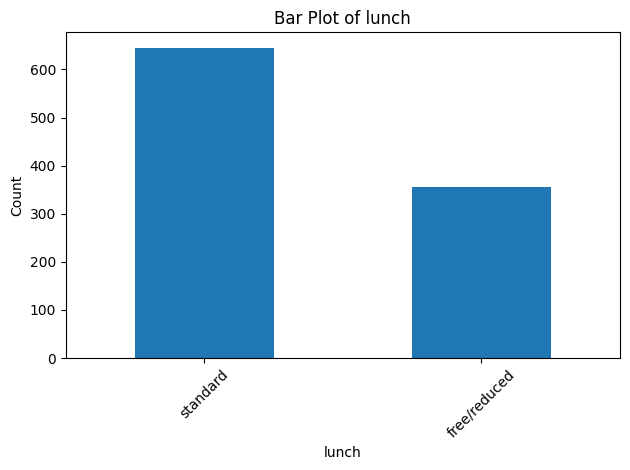

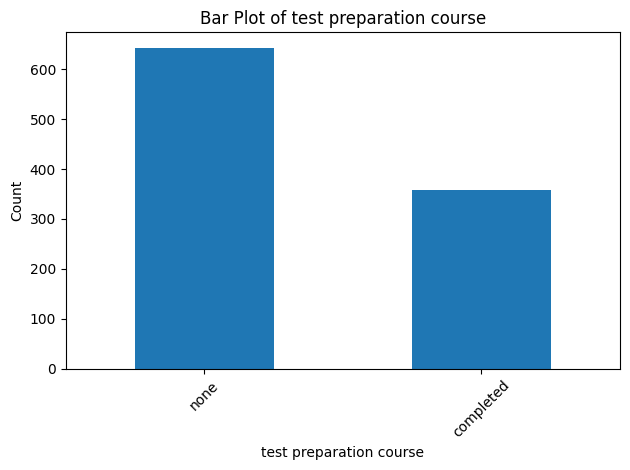

In [7]:
for col in categorial_cols:
    data = df[col].value_counts()

    plt.figure()
    data.plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Interpretasi Imbalanced data

Berdasarkan kelima diagram batang tersebut, berikut adalah interpretasinya:

### 1. **Distribusi Gender**
- Dataset ini menunjukkan distribusi yang relatif seimbang antara siswa perempuan (sekitar 520 siswa) dan laki-laki (sekitar 480 siswa).
- Perbedaan yang tidak terlalu signifikan menunjukkan sampel yang representatif untuk kedua gender [[1]].

### 2. **Distribusi Ras/Etnisitas**
- **Group C** mendominasi dengan jumlah tertinggi (sekitar 320 siswa), diikuti oleh **Group D** (sekitar 260 siswa).
- **Group B** memiliki sekitar 190 siswa, **Group E** sekitar 140 siswa, dan **Group A** paling sedikit dengan sekitar 90 siswa.
- Hal ini menunjukkan keragaman etnis dalam dataset, dengan Group C dan D sebagai mayoritas [[4]].

### 3. **Tingkat Pendidikan Orang Tua**
- Sebagian besar orang tua siswa memiliki pendidikan **"some college"** (perguruan tinggi beberapa semester) dan **"associate's degree"** (gelang associate), masing-masing sekitar 220-230 siswa.
- Sekitar 195 siswa memiliki orang tua dengan pendidikan SMA, dan 180 siswa dengan orang tua yang tidak menyelesaikan SMA.
- Hanya sekitar 120 siswa yang orang tuanya bergelar **sarjana (bachelor's degree)** dan 60 siswa dengan orang tua bergelar **master**.
- Ini menunjukkan bahwa mayoritas orang tua memiliki pendidikan menengah hingga perguruan tinggi yang belum selesai [[5]].

### 4. **Jenis Makan Siang (Lunch)**
- Sebagian besar siswa (sekitar 650 siswa) menggunakan **makan siang standar** (berbayar penuh).
- Sekitar 350 siswa menggunakan **makan siang gratis/diskon** (free/reduced), yang biasanya menunjukkan status ekonomi keluarga yang lebih rendah.
- Rasio sekitar 65:35 ini mengindikasikan bahwa mayoritas siswa berasal dari keluarga dengan kondisi ekonomi yang cukup baik [[6]].

### 5. **Kursus Persiapan Tes**
- Mayoritas siswa (sekitar 650 siswa) **tidak mengikuti** kursus persiapan tes.
- Sekitar 350 siswa **telah menyelesaikan** kursus persiapan tes.
- Ini menunjukkan bahwa hanya sekitar 35% siswa yang mengikuti program persiapan tes, yang mungkin berpengaruh pada performa akademik mereka [[7]].

### **Kesimpulan Umum:**
Dataset ini merepresentasikan 1.000 siswa dengan karakteristik yang beragam. Sebagian besar berasal dari keluarga dengan status ekonomi menengah (lunch standar), orang tua dengan pendidikan college/associate degree, dan mayoritas tidak mengikuti kursus persiapan tes. Distribusi gender yang seimbang memungkinkan analisis komparatif yang baik antara laki-laki dan perempuan [[2]][[3]].

## Detect Outlier

In [9]:
numeric_cols=df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['math score', 'reading score', 'writing score']

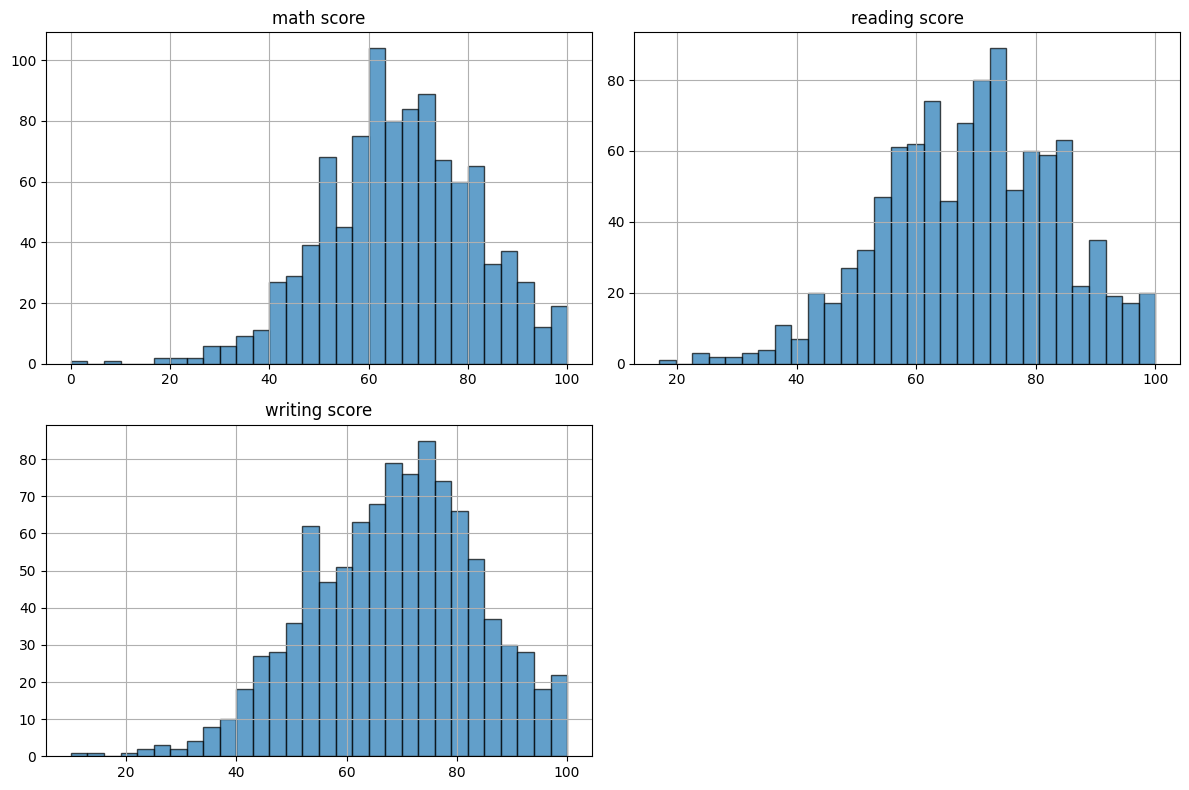

In [10]:
df[numeric_cols].hist(bins=30, figsize=(12, 8), edgecolor='black', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
from scipy.stats import skew

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, IQR

print("=" * 80)
print("DETEKSI OUTLIER DAN SKEWNESS")
print("=" * 80)

for col in numeric_cols:
    outliers, lower, upper, iqr_value = detect_outliers_iqr(df, col)
    skewness = skew(df[col])
    
    print(f"\n{col.upper()}")
    print(f"   Q1: {df[col].quantile(0.25):.2f}")
    print(f"   Q3: {df[col].quantile(0.75):.2f}")
    print(f"   IQR: {iqr_value:.2f}")
    print(f"   Batas Bawah: {lower:.2f}")
    print(f"   Batas Atas: {upper:.2f}")
    print(f"   Jumlah Outlier: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"   Skewness: {skewness:.4f}")
    
    if skewness > 0:
        print(f"   Distribusi: Positively Skewed (Right-skewed)")
    elif skewness < 0:
        print(f"   Distribusi: Negatively Skewed (Left-skewed)")
    else:
        print(f"   Distribusi: Symmetric")
    
    if len(outliers) > 0:
        print(f"   Data Outlier:")
        print(outliers[[col]].head(10))

outlier_data = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_data[col] = (df[col] < lower_bound) | (df[col] > upper_bound)

outlier_df = pd.DataFrame(outlier_data)

print("\n" + "=" * 80)
print("RINGKASAN OUTLIER DAN SKEWNESS")
print("=" * 80)

print("\nRingkasan Outlier per Kolom:")
print(outlier_df.sum())

print("\nSkewness tiap kolom:")
for col in numeric_cols:
    print(f"   {col}: {skew(df[col]):.4f}")

rows_with_outliers = df[outlier_df.any(axis=1)]
print(f"\nTotal baris dengan outlier: {len(rows_with_outliers)}")
print("\nContoh data dengan outlier:")
print(rows_with_outliers[numeric_cols].head(20))

DETEKSI OUTLIER DAN SKEWNESS

MATH SCORE
   Q1: 57.00
   Q3: 77.00
   IQR: 20.00
   Batas Bawah: 27.00
   Batas Atas: 107.00
   Jumlah Outlier: 8 (0.80%)
   Skewness: -0.2785
   Distribusi: Negatively Skewed (Left-skewed)
   Data Outlier:
     math score
17           18
59            0
145          22
338          24
466          26
787          19
842          23
980           8

READING SCORE
   Q1: 59.00
   Q3: 79.00
   IQR: 20.00
   Batas Bawah: 29.00
   Batas Atas: 109.00
   Jumlah Outlier: 6 (0.60%)
   Skewness: -0.2587
   Distribusi: Negatively Skewed (Left-skewed)
   Data Outlier:
     reading score
59              17
76              26
211             28
327             23
596             24
980             24

WRITING SCORE
   Q1: 57.75
   Q3: 79.00
   IQR: 21.25
   Batas Bawah: 25.88
   Batas Atas: 110.88
   Jumlah Outlier: 5 (0.50%)
   Skewness: -0.2890
   Distribusi: Negatively Skewed (Left-skewed)
   Data Outlier:
     writing score
59              10
76              22
3

## Interpretasi Hasil Analisis

### 1. OUTLIER ANALYSIS

**Jumlah Outlier:**
- **Math Score**: 8 outlier (0.8% dari data)
- **Reading Score**: 6 outlier (0.6% dari data)  
- **Writing Score**: 5 outlier (0.5% dari data)
- **Total baris dengan outlier**: 12 siswa

**Interpretasi:**
- Outlier sangat sedikit (< 1% per kolom), menunjukkan data relatif bersih
- Semua outlier adalah nilai SANGAT RENDAH (lihat contoh: math=0, math=8, reading=17, dll)
- 12 siswa ini adalah students at-risk (siswa berprestasi sangat rendah) yang perlu perhatian khusus
- Outlier ini bukan error, tapi data valid yang merepresentasikan siswa yang benar-benar berprestasi buruk

---

### 2. SKEWNESS ANALYSIS

**Nilai Skewness:**
```
Math Score:    -0.2785
Reading Score: -0.2587
Writing Score: -0.2890
```

**Interpretasi:**

**Semua distribusi NEGATIVELY SKEWED (skew < 0)**
- Artinya: Ekor distribusi memanjang ke kiri (nilai-nilai rendah)
- Mayoritas siswa berada di nilai tinggi (di atas rata-rata)
- Sedikit siswa yang mendapat nilai sangat rendah (outlier yang terdeteksi)

**Tingkat Kemiringan:**
- Nilai skewness antara -0.25 sampai -0.29 
- Ini termasuk hampir simetris (mendekati normal)
- Tidak terlalu miring, jadi masih aman untuk analisis statistik parametrik

**Urutan Kemiringan:**
1. **Writing** (-0.2890): Paling negatively skewed → lebih banyak siswa nilai tinggi
2. **Math** (-0.2785): Sedikit lebih seimbang
3. **Reading** (-0.2587): Paling mendekati distribusi normal

---

### 3. KESIMPULAN & REKOMENDASI

**Kesimpulan:**
1. Data berkualitas baik - outlier sangat sedikit dan valid
2. Distribusi hampir normal - skewness mendekati 0
3. Mayoritas siswa berprestasi baik - hanya 12 siswa yang perlu intervensi
4. Writing score paling mudah bagi siswa (paling banyak nilai tinggi)

**Rekomendasi:**

**A. Untuk Clustering:**
- Lanjut tanpa menghapus outlier (karena merepresentasikan kelompok siswa yang valid)
- Tidak perlu transformasi data (skewness masih acceptable, < |0.5|)
- Data siap untuk K-Means/GMM
